## https://github.com/deepinsight/insightface/tree/master/alignment/coordinate_reg

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from insightface.app import FaceAnalysis
from pathlib import Path
from scipy.spatial import ConvexHull
from tqdm import tqdm

In [2]:
#IMG_PATH = Path('/home/phdomingues/masters/data/datasets/Occlusion/images/f3.jpg')
#MASK_PATH = Path('/home/phdomingues/masters/results/Occlusion/sam/f3.png')

IMG_PATH = Path('/home/phdomingues/masters/data/UNIFESP/all/07_115110.bmp')
MASK_PATH = Path('/home/phdomingues/masters/results/UNIFESP360/sam/07_115110.png')
# Imagens que detecta a face com a segmentação = f3 / f8

In [3]:
# Carrega o RetinaFace
det_sizes = [(320,320), (640,640), (800,800)]
app = FaceAnalysis(providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])#, allowed_modules=['landmark_2d_106'])
app.prepare(ctx_id=0, det_size=det_sizes[1])

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/phdomingues/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/phdomingues/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/phdomingues/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/phdomingues/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/phdomingues/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3,

In [6]:
# Input data
img = cv2.imread(str(IMG_PATH))
mask = cv2.imread(str(MASK_PATH),0)
img_masked = cv2.bitwise_and(img, img, mask=mask)


# Output data
out_img = img.copy()
out_img_masked = img_masked.copy()

# Process keypoints
faces = app.get(img)
faces_masked = app.get(img_masked)

/mnt/d/ComputerScience/Mestrado/libs/insightface/python-package/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


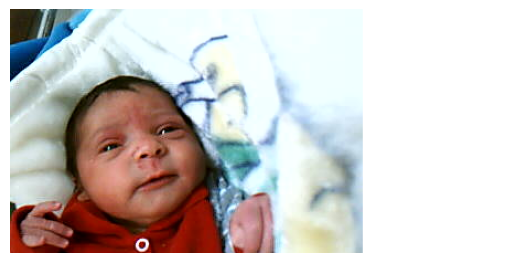

In [10]:
fig, ax = plt.subplots(1,1)

ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax.set_axis_off()

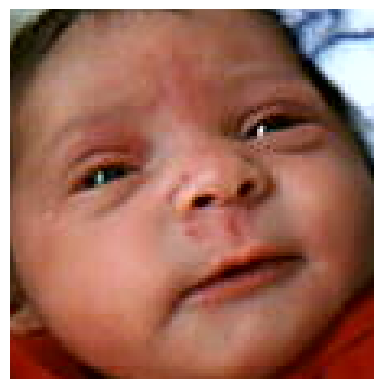

In [8]:
bbox = faces_masked[0]['bbox']
crop = img[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]

fig, ax = plt.subplots(1,1)

ax.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
ax.set_axis_off()

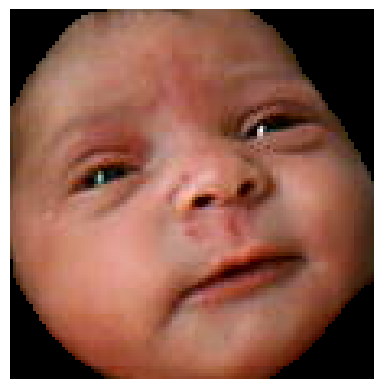

In [9]:
fig, ax = plt.subplots(1,1)

masked_crop = out_img_masked[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]
ax.imshow(cv2.cvtColor(masked_crop, cv2.COLOR_BGR2RGB))
ax.set_axis_off()
plt.show()